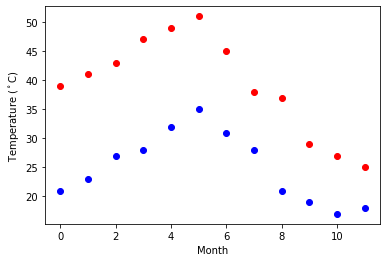

In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_T = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_T = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, max_T,'ro')
plt.plot(months, min_T,'bo')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

from scipy import optimize
def temp(times, a, b, c):
    return (a+b*np.cos((times+c)*2*np.pi/times.max()))
res_max,cov_max = optimize.curve_fit(temp, months, max_T,[20, 10, 0])
res_min,cov_min = optimize.curve_fit(temp, months, min_T,[-40, 20, 0])

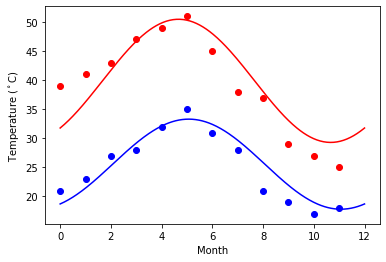

In [153]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months, max_T, 'ro')
plt.plot(days, temp(days, *res_max), 'r-')
plt.plot(months, min_T, 'bo')
plt.plot(days, temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
titanic['sex'].shape

(1310,)

In [40]:
a= titanic.sex.value_counts()
a

male      843
female    466
Name: sex, dtype: int64

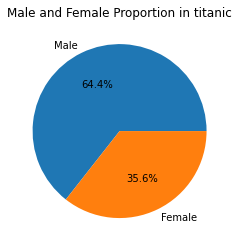

In [49]:
plt.pie(a,labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Male and Female Proportion in titanic')
plt.show()

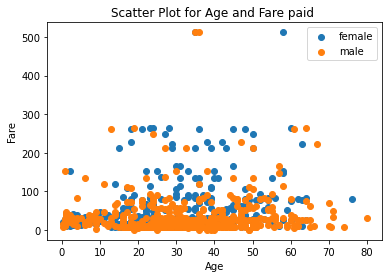

In [69]:
b = titanic.groupby("sex")
for name, c in b:
    plt.scatter(c["age"], c["fare"],label=name)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot for Age and Fare paid ')
plt.show()